In [1]:
#FINAL PROJECT 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#read in train and test files
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

#view data
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.shape
#test.shape

(10886, 12)

In [4]:
train.describe() #view extra data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
train.isnull().sum() #check for nulls (data imputation)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
train.dtypes #checking type of each field

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
#will show means of different weather info such as temp and humidity
weather_info = train.groupby(['season'], as_index = False).weather.mean() #find mean of weather in all seasons
weather_info['temp'] = train.groupby(['season'], as_index = False).temp.mean().temp#find mean of humidity in all seasons
weather_info['humidity'] = train.groupby(['season'], as_index = False).humidity.mean().humidity#find mean of humidity in all seasons
weather_info

,season,weather,temp,humidity
0,1,1.424423,12.530491,56.297841
1,2,1.422978,22.823483,60.852909
2,3,1.366630,28.789111,64.123674
3,4,1.459766,16.649239,66.173738


In [8]:
users = train.groupby(['season'], as_index=False).registered.sum() #how many registered users per season
users['casual'] = train.groupby(['season'], as_index=False).casual.sum().casual #how many casual users per season
users

,season,registered,casual
0,1,270893,41605
1,2,458610,129672
2,3,497944,142718
3,4,465894,78140


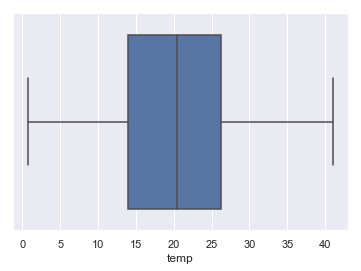

In [9]:
sns.boxplot(x = train["temp"]) #view temperature variation as a boxplot

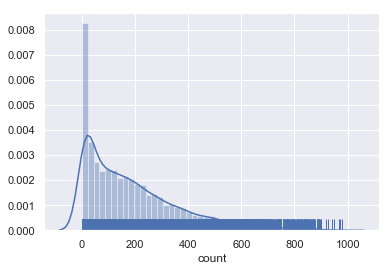

In [10]:
sns.distplot(train['count'], rug = True, kde = True, hist = True) #view count distribution

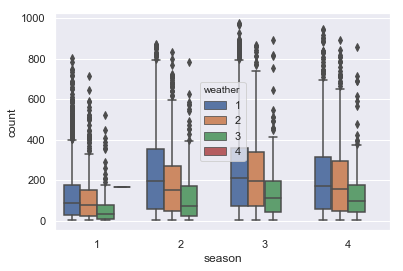

In [11]:
sns.boxplot(x="season", y="count", hue="weather", data = train) #view count by the weather and season

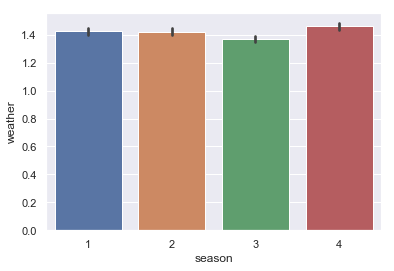

In [12]:
sns.barplot(x="season", y="weather", data=train) #weather mean by season

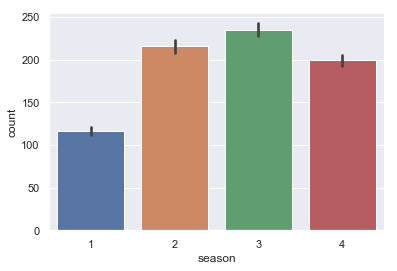

In [13]:
sns.barplot(x="season", y = "count", data = train)

In [14]:
#sns.pairplot(train) #pairplot

In [15]:
#sns.swarmplot(x="season", y="registered", hue="weather", data=train) #swarmplot view registered by weather and season

In [16]:
#sns.boxplot(x = train['count']) #view count and its outliers

In [17]:
#sns.violinplot(x = "season", y = "count", hue="weather", data = train) 

In [18]:
#sns.catplot(x='workingday',data=train,kind='count')

In [19]:
#Feature Creation
df_train = train.copy()
df_test = test.copy()

#create season dummies 1,2,3,4 for test and train
season = pd.get_dummies(df_train['season'], prefix='season')
df_train = pd.concat([df_train, season], axis = 1)

season = pd.get_dummies(df_test['season'], prefix='season')
df_test = pd.concat([df_test, season], axis = 1)


df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [20]:
#create weather dummies 1,2,3,4
weather = pd.get_dummies(df_train['weather'], prefix='weather')
df_train = pd.concat([df_train, weather], axis = 1)

weather = pd.get_dummies(df_test['weather'], prefix='weather')
df_test = pd.concat([df_test, weather], axis = 1)


df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [21]:
#dropping the unecessary fields (won't be useful for modeling)
df_train.drop(['season', 'weather'], inplace = True, axis = 1)
df_test.drop(['season', 'weather'], inplace = True, axis = 1)
df_train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [22]:
#splitting the date time column using time-series data
#year, month, day, and hour 

df_train['datetime'] = pd.to_datetime(df_train.datetime, format = '%Y-%m-%d %H:%M')
df_test['datetime'] = pd.to_datetime(df_test.datetime, format = '%Y-%m-%d %H:%M')


for df in (df_train, df_test):
    df['year'] = df.datetime.dt.year
    df['month'] = df.datetime.dt.month
    df['day'] = df.datetime.dt.day
    df['hour'] = df.datetime.dt.hour

#drop column that is not needed anymore
df_train.drop(['datetime'], inplace = True, axis = 1)
#df_test.drop(['datetime'], inplace = True, axis = 1)
df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,2011,1,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,2011,1,1,1
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2011,1,1,2
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,2011,1,1,3
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,2011,1,1,4


In [23]:
#continue to drop not needed columns
df_train.drop(['casual','registered'],axis=1,inplace=True)
df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,2011,1,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,2011,1,1,1
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2011,1,1,2
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,2011,1,1,3
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,2011,1,1,4


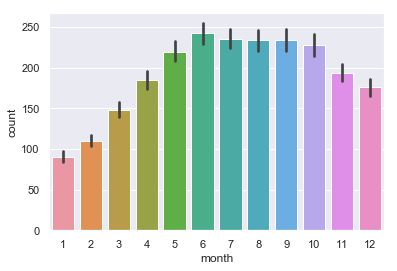

In [24]:
sns.barplot(x='month', y = 'count', data=df_train) #see count by month

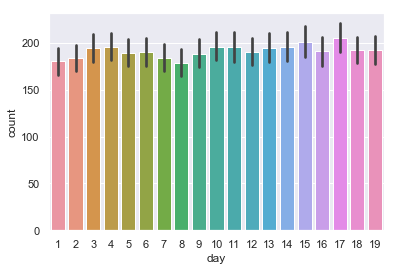

In [25]:
sns.barplot(x='day', y = 'count', data=df_train) #count by day

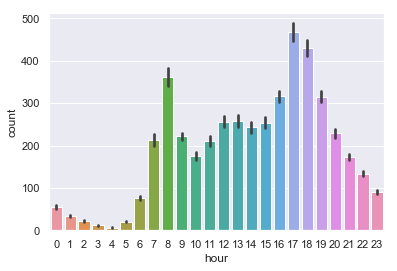

In [26]:
sns.barplot(x='hour', y = 'count', data=df_train) #count by hour

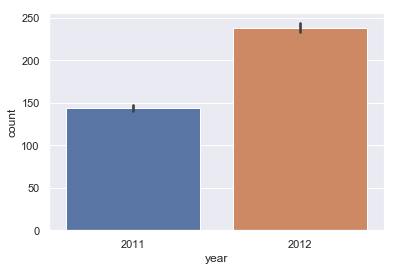

In [27]:
sns.barplot(x='year', y = 'count', data=df_train) #see count by year

In [28]:
#MODELING SECTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB as GNB

from sklearn.ensemble import RandomForestRegressor as RandomForest
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DecisionTree
#from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression as LR
#from sklearn.linear_model import LinearRegression
from sklearn import metrics


import math as m

#view shape of train data
X = df_train.drop('count', axis = 1)
print(X.shape)
y = df_train['count']
print(y.shape)

(10886, 18)
(10886,)


In [29]:
#splitting the data
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)

#models being used
model_classifier_list = {"KNearestNeighbors": KNN(), "RandomForest": RandomForest(),
"SVR": SVR(), "DecisionTree": DecisionTree(), "AdaBoost": ABR()}
models_list = []
rmsle_list = []

#each model will go through the same modeling techniques to get RMSLE score
#create the classifier, fit the model, predict the model and then calculate score
for key, value in model_classifier_list.items():
    classifier = value
    classifier.fit(train_X, train_y)
    model_predict = classifier.predict(test_X)
    rmsle_score = m.sqrt(metrics.mean_squared_log_error(model_predict, test_y))
    models_list.append(key)
    rmsle_list.append(rmsle_score)

print(models_list)
print(rmsle_list)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['KNearestNeighbors', 'RandomForest', 'SVR', 'DecisionTree', 'AdaBoost']
[0.9781304514559944, 0.3721026975805383, 1.4953744480149767, 0.44717438449313984, 1.1021807625243203]


In [30]:
#print model name with its RMSLE scores
for i in range(len(models_list)):
	print("Model: {}, RMSLE: {}".format(models_list[i], rmsle_list[i]))

Model: KNearestNeighbors, RMSLE: 0.9781304514559944
Model: RandomForest, RMSLE: 0.3721026975805383
Model: SVR, RMSLE: 1.4953744480149767
Model: DecisionTree, RMSLE: 0.44717438449313984
Model: AdaBoost, RMSLE: 1.1021807625243203


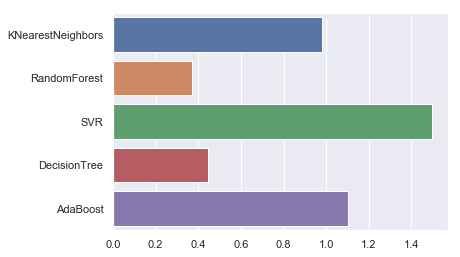

In [31]:
#visualization based on modeling
#view RMSLE scores as a visual
sns.barplot(x = rmsle_list, y = models_list)

In [32]:
'''
hyperparameter tuning on best model RandomForest
n_estimators changes the number of estimators, n_jobs uses all processors,
and max_features was just experimental
RSMLE score does not change much but it does reduce it which matters
'''


classifier = RandomForest(n_estimators = 100, n_jobs = -1, max_features = None)
classifier.fit(train_X, train_y)
model_predict = classifier.predict(test_X)
rsmle_score = m.sqrt(metrics.mean_squared_log_error(model_predict, test_y))
print("Final RMSLE score: ")
print(rsmle_score)
print("R-Squared Scores: ")
print("Train:", classifier.score(train_X, train_y))
print("Test:", classifier.score(test_X, test_y))

Final RMSLE score: 
0.3583290951377259
R-Squared Scores: 
Train: 0.991851513699398
Test: 0.9447715594952337


In [33]:
#export final data to csv for kaggle upload
model_predict = classifier.predict(df_test.drop('datetime',axis = 1))
def generate_submission(df): #function to generate submission df
    submission = df.copy()
    return submission

df_submission = generate_submission(test) #getting df
df_submission['count'] = model_predict
df_submission = df_submission[['datetime', 'count']] #only columns needed
#df_submission.to_csv("submission.csv", index=False) #getting file
df_submission


,datetime,count
0,2011-01-20 00:00:00,11.66
1,2011-01-20 01:00:00,7.41
2,2011-01-20 02:00:00,5.34
3,2011-01-20 03:00:00,3.62
4,2011-01-20 04:00:00,2.64
5,2011-01-20 05:00:00,8.49
6,2011-01-20 06:00:00,34.24
7,2011-01-20 07:00:00,89.66
8,2011-01-20 08:00:00,176.21
9,2011-01-20 09:00:00,107.45


In [34]:
#Working with the Naive Model
naive_train = df_train.copy()
naive_test = df_test.copy()

naive_train['count'] = naive_train['count'].mean()
naive_X = naive_train.drop('count', axis = 1)

naive_y = naive_train['count']
naive_y.head()

train_X, test_X, train_y, test_y = train_test_split(naive_X, naive_y, train_size = .8, test_size = .2, random_state = 100)

classifier = RandomForest()
classifier.fit(train_X, train_y)
model_predict = classifier.predict(test_X)
rsmle_score = m.sqrt(metrics.mean_squared_log_error(model_predict, test_y))
print("Naive RMSLE score: ")
print(rsmle_score)

Naive RMSLE score: 
1.7763568394002505e-14


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
